1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels) - **NOT ANSWERED**
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method - **NOT ANSWERED**


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import scipy as sp

In [125]:
mean = 0
std = 0.1
x = np.random.normal(mean, std, 200)

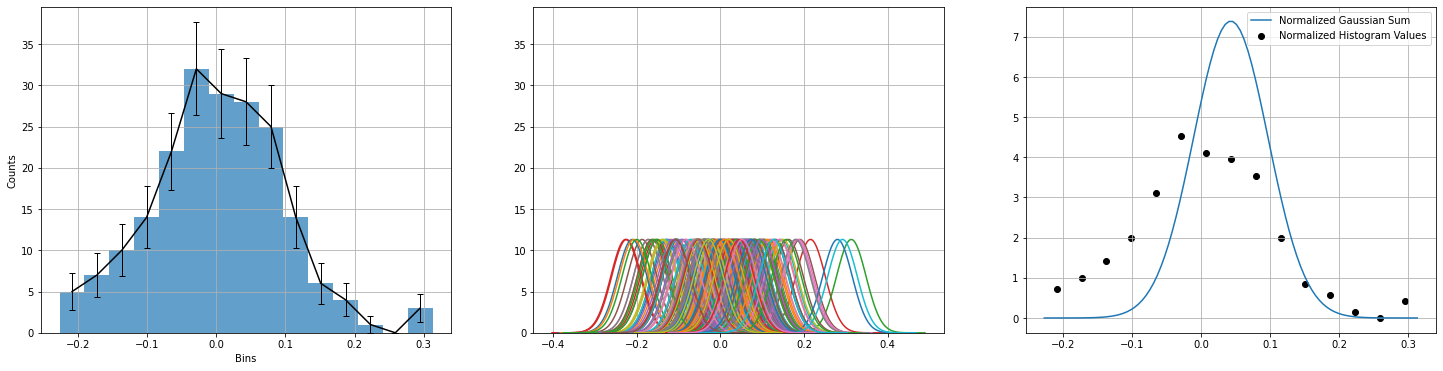

In [126]:
#Histogram 

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))

n_bins = 15
yvals, bins, patches = ax[0].hist(x, n_bins, alpha=0.7)
ax[0].grid(True)
ax[0].set_ylabel('Counts')
ax[0].set_xlabel('Bins')

errors = np.sqrt(yvals)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
ax[0].errorbar(bin_centers, yvals, yerr=errors, fmt='black', ecolor='Black', elinewidth=1, capsize=3)


#Individual Gaussians
std_default = 1.06 *  x.std() * (x.size**(-1/5))
gaussians = []

for xval in x:
    mean = xval
    std = std_default
    x_range = np.linspace(mean - 5*std, mean + 5*std, 100)
    gaussian = stats.norm.pdf(x_range, mean, std)

    gaussians.append(gaussian)
    ax[1].plot(x_range, gaussian)

ax[1].set_ylim(0, max(ax[0].get_ylim()))
ax[1].grid(True)


#Summed Gaussian
gsum = np.sum(gaussians, axis=0)
x_range = np.linspace(x.min(), x.max(), len(gsum))

integral_gauss = sp.integrate.trapz(gsum, dx=(x_range[1]-x_range[0]))
integral_hist = sp.integrate.trapz(yvals, dx=(bins[1]-bins[0]))

gsum_normed = gsum/integral_gauss
yvals_normed = yvals/integral_hist
ax[2].plot(x_range, gsum_normed, label='Normalized Gaussian Sum')
ax[2].scatter(bin_centers, yvals_normed, label='Normalized Histogram Values', color='Black')
ax[2].grid(True)
ax[2].legend()



2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

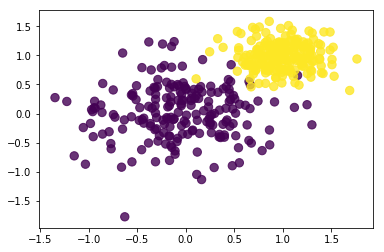

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

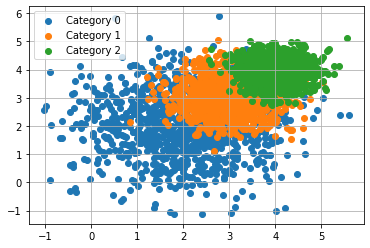

In [3]:
def f(n):
    data = []
    for dim in range(1, n+1):
        mean = 1 + dim
        std = 0.1 + 1/dim

        row = np.random.normal(mean, std, size=(1000, 2))
        data.append(row)
    
    return data


n = 3
dataset = f(n)

for pos, row in enumerate(dataset):
    plt.scatter(row[:, 0], row[:, 1], label=f'Category {pos}')

plt.grid(True)
plt.legend(loc='best')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot - **NOT ANSWERED**

In [17]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
from scipy import stats

In [14]:
data = np.load('residuals_261.npy', allow_pickle=True).item()
df = pd.DataFrame(data)
print(df.head())

   residuals  distances
0       1.10       16.0
1      -1.95        6.3
2      -7.20        3.4
3      -4.15        8.4
4      -6.59        1.7


In [15]:
#3
df = df[abs(df['residuals']) < 2]
df = df.reset_index(drop=True)
print(df.head())

   residuals  distances
0   1.100000       16.0
1  -1.950000        6.3
2  -0.042857        3.3
3   0.128571        5.3
4   0.085714       15.0


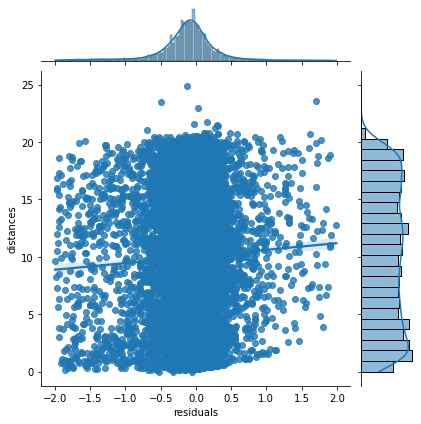

In [18]:
#4
linreg = stats.linregress(df['residuals'], df['distances'])

#5
sns.jointplot(x='residuals', y='distances', data=df, kind='reg')

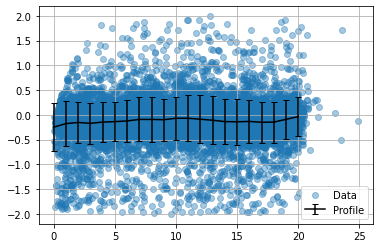

In [19]:
x = np.linspace(0, 20, 21)
y = []
erry = []

bin_gap = x[1] - x[0]

for pos, xval in enumerate(x):
  rval = xval + bin_gap
  lval = xval - bin_gap
  mask = (df['distances']<rval) & (df['distances']>lval)
  res_list = df[mask]['residuals']

  y.append(np.mean(res_list))
  erry.append(np.std(res_list))


plt.scatter(df['distances'], df['residuals'], alpha=0.4, label='Data')
plt.errorbar(x, y, yerr=erry, fmt='black', capsize=3, label='Profile')
plt.grid(True)
plt.legend()
plt.show()